In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import keras 
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, Lambda, Concatenate, BatchNormalization
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from pyod.models.hbos import HBOS
from pyod.models.cof import COF
from pyod.models.knn import KNN
from pyod.models.loda import LODA
from pyod.models.copod import COPOD
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_fscore_support
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Input, Dropout
import networkx as nx
import seaborn as sns
from scipy import sparse
from scipy.linalg import svd
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv(r'data\logs.csv')

In [3]:
data

,agent.ip,agent.id,agent.type,agent.version,agent.name,@timestamp,input.type,log.file.path,rule.level,rule.groups,...,location,id,error.type,error.message,agent.hostname,data.command,data.file,data.status,data.title,_score
0,192.168.56.108,7,filebeat,7.10.2,LAPTOP-RSR2EPL0,"Apr 17, 2025 @ 10:56:22.001",log,/var/ossec/logs/alerts/alerts.json,3,"windows, windows_security",...,EventChannel,1744867582,-,-,wazuh-server,-,-,-,-,-
1,192.168.56.108,7,filebeat,7.10.2,LAPTOP-RSR2EPL0,"Apr 17, 2025 @ 10:56:21.968",log,/var/ossec/logs/alerts/alerts.json,3,"windows, windows_security, authentication_success",...,EventChannel,1744867582,-,-,wazuh-server,-,-,-,-,-
2,192.168.56.108,7,filebeat,7.10.2,LAPTOP-RSR2EPL0,"Apr 17, 2025 @ 10:56:21.961",log,/var/ossec/logs/alerts/alerts.json,3,"windows, windows_security, authentication_success",...,EventChannel,1744867582,-,-,wazuh-server,-,-,-,-,-
3,192.168.56.108,7,filebeat,7.10.2,LAPTOP-RSR2EPL0,"Apr 17, 2025 @ 10:56:21.958",log,/var/ossec/logs/alerts/alerts.json,3,"windows, windows_security, authentication_success",...,EventChannel,1744867582,-,-,wazuh-server,-,-,-,-,-
4,-,0,filebeat,7.10.2,wazuh-server,"Apr 17, 2025 @ 10:56:21.783",log,/var/ossec/logs/alerts/alerts.json,3,"pam, syslog",...,/var/log/auth.log,1744867582,-,-,wazuh-server,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-,0,-,-,wazuh-server,"Apr 8, 2025 @ 00:20:32.745",log,-,3,"syslog, sudo",...,/var/log/auth.log,1744051832,-,-,-,/usr/bin/filebeat modules enable system,-,-,-,-
19996,-,0,-,-,wazuh-server,"Apr 8, 2025 @ 00:20:32.745",log,-,3,"pam, syslog, authentication_success",...,/var/log/auth.log,1744051832,-,-,-,-,-,-,-,-
19997,-,0,-,-,wazuh-server,"Apr 8, 2025 @ 00:20:10.714",log,-,3,"pam, syslog",...,/var/log/auth.log,1744051811,-,-,-,-,-,-,-,-
19998,-,0,-,-,wazuh-server,"Apr 8, 2025 @ 00:05:53.010",log,-,3,"pam, syslog, authentication_success",...,/var/log/auth.log,1744050954,-,-,-,-,-,-,-,-


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   agent.ip        20000 non-null  object
 1   agent.id        20000 non-null  object
 2   agent.type      20000 non-null  object
 3   agent.version   20000 non-null  object
 4   agent.name      20000 non-null  object
 5   @timestamp      20000 non-null  object
 6   input.type      20000 non-null  object
 7   log.file.path   20000 non-null  object
 8   rule.level      20000 non-null  object
 9   rule.groups     20000 non-null  object
 10  message         20000 non-null  object
 11  location        20000 non-null  object
 12  id              20000 non-null  object
 13  error.type      20000 non-null  object
 14  error.message   20000 non-null  object
 15  agent.hostname  20000 non-null  object
 16  data.command    20000 non-null  object
 17  data.file       20000 non-null  object
 18  data.s

In [5]:
data.columns

Index(['agent.ip', 'agent.id', 'agent.type', 'agent.version', 'agent.name',
       '@timestamp', 'input.type', 'log.file.path', 'rule.level',
       'rule.groups', 'message', 'location', 'id', 'error.type',
       'error.message', 'agent.hostname', 'data.command', 'data.file',
       'data.status', 'data.title', '_score'],
      dtype='object')

In [6]:
data.head(50)

,agent.ip,agent.id,agent.type,agent.version,agent.name,@timestamp,input.type,log.file.path,rule.level,rule.groups,...,location,id,error.type,error.message,agent.hostname,data.command,data.file,data.status,data.title,_score
0,192.168.56.108,7,filebeat,7.10.2,LAPTOP-RSR2EPL0,"Apr 17, 2025 @ 10:56:22.001",log,/var/ossec/logs/alerts/alerts.json,3,"windows, windows_security",...,EventChannel,1744867582,-,-,wazuh-server,-,-,-,-,-
1,192.168.56.108,7,filebeat,7.10.2,LAPTOP-RSR2EPL0,"Apr 17, 2025 @ 10:56:21.968",log,/var/ossec/logs/alerts/alerts.json,3,"windows, windows_security, authentication_success",...,EventChannel,1744867582,-,-,wazuh-server,-,-,-,-,-
2,192.168.56.108,7,filebeat,7.10.2,LAPTOP-RSR2EPL0,"Apr 17, 2025 @ 10:56:21.961",log,/var/ossec/logs/alerts/alerts.json,3,"windows, windows_security, authentication_success",...,EventChannel,1744867582,-,-,wazuh-server,-,-,-,-,-
3,192.168.56.108,7,filebeat,7.10.2,LAPTOP-RSR2EPL0,"Apr 17, 2025 @ 10:56:21.958",log,/var/ossec/logs/alerts/alerts.json,3,"windows, windows_security, authentication_success",...,EventChannel,1744867582,-,-,wazuh-server,-,-,-,-,-
4,-,0,filebeat,7.10.2,wazuh-server,"Apr 17, 2025 @ 10:56:21.783",log,/var/ossec/logs/alerts/alerts.json,3,"pam, syslog",...,/var/log/auth.log,1744867582,-,-,wazuh-server,-,-,-,-,-
5,192.168.56.108,7,filebeat,7.10.2,LAPTOP-RSR2EPL0,"Apr 17, 2025 @ 10:56:21.741",log,/var/ossec/logs/alerts/alerts.json,3,"windows, windows_security, authentication_success",...,EventChannel,1744867582,-,-,wazuh-server,-,-,-,-,-
6,192.168.56.108,7,filebeat,7.10.2,LAPTOP-RSR2EPL0,"Apr 17, 2025 @ 10:56:21.442",log,/var/ossec/logs/alerts/alerts.json,3,"windows, windows_security, authentication_success",...,EventChannel,1744867582,-,-,wazuh-server,-,-,-,-,-
7,192.168.56.108,7,filebeat,7.10.2,LAPTOP-RSR2EPL0,"Apr 17, 2025 @ 10:56:21.397",log,/var/ossec/logs/alerts/alerts.json,3,"windows, windows_security, authentication_success",...,EventChannel,1744867581,-,-,wazuh-server,-,-,-,-,-
8,-,0,filebeat,7.10.2,wazuh-server,"Apr 17, 2025 @ 10:56:20.238",log,/var/ossec/logs/alerts/alerts.json,3,"pam, syslog, authentication_success",...,/var/log/auth.log,1744867580,-,-,wazuh-server,-,-,-,-,-
9,-,0,filebeat,7.10.2,wazuh-server,"Apr 17, 2025 @ 10:56:20.200",log,/var/ossec/logs/alerts/alerts.json,3,"syslog, sudo",...,/var/log/auth.log,1744867580,-,-,wazuh-server,/usr/bin/systemctl status elasticsearch,-,-,-,-


In [7]:
data['has_ip'] = data['agent.ip'].apply(lambda x: 0 if x == '-' else 1)

In [8]:
data['@timestamp'] = pd.to_datetime(data['@timestamp'].str.replace(' @ ', ' ', regex=False), errors='coerce')
data['hour'] = data['@timestamp'].dt.hour
data['minute'] = data['@timestamp'].dt.minute
data['second'] = data['@timestamp'].dt.second
data['day_of_week'] = data['@timestamp'].dt.dayofweek
data['day_of_month'] = data['@timestamp'].dt.day

In [9]:
data['agent.id'] = pd.to_numeric(data['agent.id'], errors='coerce')
data['is_local_event'] = ((data['agent.id'] == 0) | (data['agent.hostname'] == data['agent.name'])).astype(int)

In [10]:
group_categories = ['windows', 'syslog', 'pam', 'ossec', 'rootcheck', 'authentication_success',
                        'sudo', 'apparmor', 'windows_security']
    
for category in group_categories:
    data[f'group_{category}'] = data['rule.groups'].apply(
        lambda x: 1 if isinstance(x, str) and category in x else 0
    )

In [11]:
common_locations = ['EventChannel', '/var/log/auth.log', '/var/log/syslog', 'rootcheck']
for loc in common_locations:
    data[f'location_{loc.replace("/", "_")}'] = data['location'].apply(
        lambda x: 1 if x == loc else 0
    )

In [12]:
data.drop(columns = ['location'], inplace=True)

In [13]:
data_fields = ['data.command', 'data.file', 'data.status', 'data.title']
for field in data_fields:
    if field in data.columns:  # Make sure the field exists
        data[f'has_{field.replace(".", "_")}'] = (~data[field].isna() & 
                                                       (data[field] != '-')).astype(int)
    else:
        data[f'has_{field.replace(".", "_")}'] = 0  # Default if field doesn't exist

In [14]:
data['rule.level'] = pd.to_numeric(data['rule.level'], errors='coerce').fillna(0)
data['severity_low'] = (data['rule.level'] <= 3).astype(int)
data['severity_medium'] = ((data['rule.level'] > 3) & (data['rule.level'] <= 6)).astype(int)
data['severity_high'] = (data['rule.level'] > 6).astype(int)

In [15]:
data['is_authentication'] = data['rule.groups'].apply(
        lambda x: 1 if isinstance(x, str) and 'authentication' in x else 0
    )

In [16]:
if 'data.title' in data.columns:
    data['is_security_alert'] = ((data['rule.level'] > 5) | 
                                       (data['data.title'] == 'Trojaned version of file detected.')).astype(int)
else:
    data['is_security_alert'] = (data['rule.level'] > 5).astype(int)

In [17]:
feature_columns = [col for col in data.columns if col.startswith(('has_', 'is_', 'group_', 'location_', 'severity_'))]

In [18]:
# Split the data by log source type for more accurate modeling
def split_by_source_type(df):
    # Create different dataframes based on logical groupings
    # Safely check if columns exist first
    if 'group_windows' in df.columns:
        windows_logs = df[df['group_windows'] == 1]
    else:
        windows_logs = df.head(0)  # Empty dataframe with same structure
        
    if 'group_syslog' in df.columns:
        system_logs = df[df['group_syslog'] == 1]
    else:
        system_logs = df.head(0)
        
    if 'group_ossec' in df.columns:
        security_checks = df[df['group_ossec'] == 1]
    else:
        security_checks = df.head(0)
    
    return {
        'windows': windows_logs,
        'system': system_logs, 
        'security': security_checks,
        'all': df  # Keep the complete set too
    }

def create_train_test_split(processed_df, feature_columns, split_ratio=0.7, random_state=42):
    """
    Create train/test splits for anomaly detection on preprocessed log data,
    using a combination of temporal and stratified approaches.
    """
    # Make a copy to avoid modifying the original
    df = processed_df.copy()
    
    # Convert timestamps to datetime if not already done
    if '@timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['@timestamp'], format="MMM d, yyyy @ HH:mm:ss.SSS")
    
    # Sort by timestamp to maintain temporal order
    df = df.sort_values('timestamp')
    
    # Create anomaly label using available columns
    if 'is_security_alert' in df.columns and 'severity_high' in df.columns:
        df['is_anomaly'] = df['is_security_alert'] | (df['severity_high'] == 1)
    elif 'rule.level' in df.columns:
        # Fallback if previous columns don't exist
        df['is_anomaly'] = (df['rule.level'] > 5).astype(int)
    else:
        # Last resort - create a placeholder label
        print("Warning: No suitable columns found for anomaly labeling. Using placeholder.")
        df['is_anomaly'] = 0
    
    # Get data source splits using your function
    source_splits = split_by_source_type(df)
    
    # Dictionary to store splits for each source type
    splits = {}
    
    # Create splits for each source type
    for source_type, source_df in source_splits.items():
        # Skip if the source has too few records
        if len(source_df) < 10:
            continue
        
        # Ensure anomaly column exists in the source dataframe
        if 'is_anomaly' not in source_df.columns:
            source_df['is_anomaly'] = 0  # Add placeholder if missing
            
        # Calculate the temporal cutoff point
        cutoff_idx = int(len(source_df) * split_ratio)
        if cutoff_idx >= len(source_df):
            cutoff_idx = len(source_df) - 1
        cutoff_time = source_df.iloc[cutoff_idx]['timestamp']
        
        # Create initial temporal split
        train_df = source_df[source_df['timestamp'] < cutoff_time]
        test_df = source_df[source_df['timestamp'] >= cutoff_time]
        
        # Handle empty splits
        if len(train_df) == 0 or len(test_df) == 0:
            # Fall back to random split if temporal doesn't work
            train_df, test_df = train_test_split(source_df, test_size=(1-split_ratio), 
                                                random_state=random_state)
        
        # Calculate anomaly distribution
        train_anomaly_count = train_df['is_anomaly'].sum()
        test_anomaly_count = test_df['is_anomaly'].sum()
        
        # Handle edge cases: ensure both splits have some anomalies if available
        total_anomalies = train_anomaly_count + test_anomaly_count
        if test_anomaly_count == 0 and train_anomaly_count > 0:
            # Move some anomalies to test set
            train_anomalies = train_df[train_df['is_anomaly'] == 1]
            
            # Take latest 20% of anomalies from training
            move_count = max(int(len(train_anomalies) * 0.2), 1)
            if move_count > len(train_anomalies):
                move_count = len(train_anomalies)
                
            anomalies_to_move = train_anomalies.iloc[-move_count:]
            
            # Update the splits
            train_df = train_df[~train_df.index.isin(anomalies_to_move.index)]
            test_df = pd.concat([test_df, anomalies_to_move]).sort_values('timestamp')
        
        # Filter for features that exist in the dataframe
        available_features = [col for col in feature_columns if col in source_df.columns]
        
        # Store relevant features only
        train_features = train_df[available_features]
        test_features = test_df[available_features]
        
        # Store the splits
        splits[source_type] = {
            'train_data': train_features,
            'test_data': test_features,
            'train_df': train_df,  # Full dataframe for reference
            'test_df': test_df,    # Full dataframe for reference
            'train_anomalies': train_df['is_anomaly'].sum(),
            'test_anomalies': test_df['is_anomaly'].sum(),
            'feature_columns': available_features
        }
    
    # Only create general split if we have enough data
    if len(df) > 0:
        cutoff_idx = int(len(df) * split_ratio)
        if cutoff_idx >= len(df):
            cutoff_idx = len(df) - 1
        cutoff_time = df.iloc[cutoff_idx]['timestamp']
        
        # Filter for available features
        avail_features = [col for col in feature_columns if col in df.columns]
        
        general_split = {
            'train_data': df[df['timestamp'] < cutoff_time][avail_features],
            'test_data': df[df['timestamp'] >= cutoff_time][avail_features],
            'train_df': df[df['timestamp'] < cutoff_time],
            'test_df': df[df['timestamp'] >= cutoff_time],
            'train_anomalies': df[df['timestamp'] < cutoff_time]['is_anomaly'].sum(),
            'test_anomalies': df[df['timestamp'] >= cutoff_time]['is_anomaly'].sum(),
            'feature_columns': avail_features
        }
        
        # Add the general split
        splits['general'] = general_split
    
    return splits

# Usage example:
# Already preprocessed data
# data = your_preprocessed_dataframe
# feature_columns = [columns from preprocessing]

# Create the splits
# splits = create_train_test_split(data, feature_columns)

# For each log source type:
# windows_train = splits['windows']['train_data']
# windows_test = splits['windows']['test_data']
# system_train = splits['system']['train_data']
# system_test = splits['system']['test_data']

In [19]:
splits = create_train_test_split(data, feature_columns, split_ratio=0.7, random_state=42)
splits['windows']['train_data'].shape, splits['windows']['test_data'].shape, splits['windows']['train_anomalies'], splits['windows']['test_anomalies']

((1375, 24), (590, 24), 21, 2)

In [20]:
splits['system']['train_data'].shape, splits['system']['test_data'].shape, splits['system']['train_anomalies'], splits['system']['test_anomalies']

((1890, 24), (811, 24), 87, 254)

In [21]:
splits['security']['train_data'].shape, splits['security']['test_data'].shape, splits['security']['train_anomalies'], splits['security']['test_anomalies']

((4588, 24), (1967, 24), 267, 225)

In [22]:
splits['general']['train_data'].shape, splits['general']['test_data'].shape, splits['general']['train_anomalies'], splits['general']['test_anomalies']

((14000, 24), (6000, 24), 1228, 425)

In [23]:
def train_and_evaluate_models(splits):
    """Train multiple anomaly detection models on each data split and evaluate performance"""
    results = {}
    
    for source_type, split_data in splits.items():
        print(f"\nTraining models for {source_type} data source")
        
        # Extract data
        X_train = split_data['train_data']
        X_test = split_data['test_data']
        
        # Get actual anomaly labels if available
        y_test = split_data['test_df']['is_anomaly'] if 'is_anomaly' in split_data['test_df'].columns else None
        
        # Skip if not enough data
        if len(X_train) < 10 or len(X_test) < 5:
            print(f"  Skipping {source_type} due to insufficient data")
            continue
        
        # Scale the data for better model performance
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Determine contamination level (approximate rate of anomalies)
        if y_test is not None:
            contamination = max(0.01, min(0.25, y_test.mean()))  # Bounded between 1% and 25%
        else:
            contamination = 0.05  # Default value
            
        print(f"  Using contamination rate: {contamination:.3f}")
            
        # Initialize models
        models = {
            # Sklearn-based models
            'Isolation Forest': IsolationForest(contamination=contamination, random_state=42, n_estimators=200),
            'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, contamination=contamination, novelty=True),
            'One-Class SVM': OneClassSVM(kernel='rbf', gamma='auto', nu=contamination),
            
            # PyOD models (more specialized anomaly detection)
            'HBOS': HBOS(contamination=contamination, n_bins=20),
            'COF': COF(contamination=contamination, n_neighbors=20),
            'KNN': KNN(contamination=contamination, n_neighbors=20, method='mean'),
            'LODA': LODA(contamination=contamination, n_bins=15),
            'COPOD': COPOD(contamination=contamination),
        }
        
        # Add clustering-based and density-based models if we have enough data
        if len(X_train) >= 50:
            # Dimension reduction if we have many features
            if X_train.shape[1] > 10:
                # Reduce to 8 components or fewer
                n_components = min(8, X_train.shape[1] - 1)
                pca = PCA(n_components=n_components)
                X_train_pca = pca.fit_transform(X_train_scaled)
                X_test_pca = pca.transform(X_test_scaled)
                
                # Create PCA-based model for high-dimensional data
                models['PCA-Based'] = create_pca_anomaly_detector(pca, contamination)
                
                # Add Gaussian Mixture Model on reduced dimensions
                models['GMM'] = GaussianMixture(n_components=min(5, len(X_train)//10), 
                                               covariance_type='full', random_state=42)
            else:
                X_train_pca = X_train_scaled
                X_test_pca = X_test_scaled
            
            # Add DBSCAN for density-based clustering
            models['DBSCAN'] = create_dbscan_anomaly_detector(X_train_pca, contamination)
            
            # Add K-Means for centroid-based clustering
            models['K-Means'] = create_kmeans_anomaly_detector(X_train_pca, contamination)
        
        source_results = {}
        
        # Train and evaluate each model
        for model_name, model in models.items():
            print(f"  Training {model_name}...")
            
            try:
                # Different handling based on model type
                if model_name in ['PCA-Based', 'DBSCAN', 'K-Means']:
                    # These are custom detectors
                    if model_name == 'PCA-Based':
                        # PCA detector already fitted during creation
                        y_scores = model.score_samples(X_test_scaled)
                        y_pred = model.predict(X_test_scaled)
                    elif model_name == 'DBSCAN':
                        # DBSCAN detector already fitted during creation
                        y_scores = model.score_samples(X_test_pca)
                        y_pred = model.predict(X_test_pca)
                    elif model_name == 'K-Means':
                        # K-Means detector already fitted during creation
                        y_scores = model.score_samples(X_test_pca)
                        y_pred = model.predict(X_test_pca)
                
                elif model_name == 'GMM':
                    # GMM has different API
                    model.fit(X_train_pca)
                    y_scores = -model.score_samples(X_test_pca)  # Negative log-likelihood
                    threshold = np.percentile(y_scores, 100 * (1 - contamination))
                    y_pred = (y_scores > threshold).astype(int)
                
                elif model_name in ['HBOS', 'COF', 'KNN', 'LODA', 'COPOD']:
                    # PyOD models
                    model.fit(X_train_scaled)
                    y_scores = model.decision_function(X_test_scaled)
                    y_pred = model.predict(X_test_scaled)
                
                else:
                    # Standard sklearn models
                    model.fit(X_train_scaled)
                    
                    # Generate anomaly scores for test data
                    if model_name == 'Local Outlier Factor':
                        # LOF uses negative_outlier_factor_ for scoring
                        y_scores = model.decision_function(X_test_scaled) * -1
                    else:
                        # For models like Isolation Forest and One-Class SVM
                        y_scores = model.decision_function(X_test_scaled) * -1  # Invert so higher = more anomalous
                    
                    # Generate binary predictions
                    y_pred = model.predict(X_test_scaled)
                    # Convert from sklearn format (-1 for anomalies, 1 for normal) to 1=anomaly, 0=normal
                    y_pred = np.where(y_pred == -1, 1, 0)
                
                # Store predictions and scores
                model_results = {
                    'predictions': y_pred,
                    'anomaly_scores': y_scores,
                    'model': model
                }
                
                # Evaluate if we have ground truth labels
                if y_test is not None:
                    precision, recall, f1, _ = precision_recall_fscore_support(
                        y_test, y_pred, average='binary', zero_division=0)
                    
                    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
                    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
                    
                    model_results.update({
                        'precision': precision,
                        'recall': recall,
                        'f1_score': f1,
                        'specificity': specificity,
                        'true_positives': tp,
                        'false_positives': fp,
                        'true_negatives': tn,
                        'false_negatives': fn
                    })
                    
                    print(f"    {model_name} - F1: {f1:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}")
                
                source_results[model_name] = model_results
                
            except Exception as e:
                print(f"    Error training {model_name}: {str(e)}")
                continue
        
        results[source_type] = source_results
    
    return results

In [24]:
def create_pca_anomaly_detector(pca, contamination=0.05):
    """Create a PCA-based anomaly detector using reconstruction error"""
    
    class PCADetector:
        def __init__(self, pca, contamination):
            self.pca = pca
            self.contamination = contamination
            self.threshold = None
            
        def score_samples(self, X):
            # Calculate reconstruction error
            X_transformed = self.pca.transform(X)
            X_reconstructed = self.pca.inverse_transform(X_transformed)
            reconstruction_error = np.sum((X - X_reconstructed)**2, axis=1)
            return reconstruction_error
            
        def predict(self, X):
            scores = self.score_samples(X)
            if self.threshold is None:
                # Set threshold based on contamination
                self.threshold = np.percentile(scores, 100 * (1 - self.contamination))
            return (scores > self.threshold).astype(int)
    
    return PCADetector(pca, contamination)

def create_dbscan_anomaly_detector(X_train, contamination=0.05):
    """Create a DBSCAN-based anomaly detector"""
    
    class DBSCANDetector:
        def __init__(self, X_train, contamination):
            self.contamination = contamination
            
            # Estimate epsilon (neighborhood radius) based on data
            from sklearn.neighbors import NearestNeighbors
            n_samples = len(X_train)
            k = max(2, min(20, n_samples // 10))  # Reasonable k value based on data size
            
            # Calculate distances to k nearest neighbors
            nbrs = NearestNeighbors(n_neighbors=k).fit(X_train)
            distances, _ = nbrs.kneighbors(X_train)
            
            # Use average of k-distances as epsilon
            self.eps = np.mean(distances[:, -1]) * 1.5
            
            # Fit DBSCAN
            self.dbscan = DBSCAN(eps=self.eps, min_samples=k-1)
            self.labels = self.dbscan.fit_predict(X_train)
            
            # Points with label -1 are outliers
            self.outlier_scores = np.zeros(len(X_train))
            
            # For each point, calculate distance to nearest core point
            core_samples = X_train[self.labels != -1]
            if len(core_samples) > 0:  # If we have core points
                for i, point in enumerate(X_train):
                    if self.labels[i] != -1:
                        # Core points get low anomaly score
                        self.outlier_scores[i] = 0.1 * self.eps
                    else:
                        # Calculate distance to nearest core point
                        dists = np.linalg.norm(core_samples - point, axis=1)
                        self.outlier_scores[i] = np.min(dists) if len(dists) > 0 else self.eps * 2
            else:
                # If no core points, use distance to center
                center = np.mean(X_train, axis=0)
                for i, point in enumerate(X_train):
                    self.outlier_scores[i] = np.linalg.norm(point - center)
            
            # Normalize scores to 0-1 range
            if np.max(self.outlier_scores) > np.min(self.outlier_scores):
                self.outlier_scores = (self.outlier_scores - np.min(self.outlier_scores)) / (np.max(self.outlier_scores) - np.min(self.outlier_scores))
            
            # Store training data for score_samples and nearest neighbors model
            self.X_train = X_train
            self.nn = NearestNeighbors(n_neighbors=min(5, len(X_train))).fit(X_train)
        
        def score_samples(self, X):
            # For new points, find distance to nearest training point
            # and use its score, adjusted by the actual distance
            distances, indices = self.nn.kneighbors(X)
            scores = np.zeros(len(X))
            
            for i in range(len(X)):
                # Base score on nearest neighbors' scores
                neighbor_scores = self.outlier_scores[indices[i]]
                # Adjust scores based on distances
                distance_factor = distances[i, 0] / self.eps
                # Combine the factors
                scores[i] = np.mean(neighbor_scores) + distance_factor
            
            return scores
            
        def predict(self, X):
            scores = self.score_samples(X)
            threshold = np.percentile(scores, 100 * (1 - self.contamination))
            return (scores > threshold).astype(int)
    
    return DBSCANDetector(X_train, contamination)

def create_kmeans_anomaly_detector(X_train, contamination=0.05):
    """Create a K-Means-based anomaly detector using distance to nearest centroid"""
    
    class KMeansDetector:
        def __init__(self, X_train, contamination):
            self.contamination = contamination
            
            # Determine optimal number of clusters (simple method)
            n_samples = len(X_train)
            self.k = min(8, max(2, n_samples // 50))  # Between 2 and 8 clusters
            
            # Fit K-Means
            self.kmeans = KMeans(n_clusters=self.k, random_state=42)
            self.kmeans.fit(X_train)
            
            # Calculate distances to nearest centroid for training data
            distances = self._get_distances(X_train)
            
            # Set threshold based on percentile of distances
            self.threshold = np.percentile(distances, 100 * (1 - contamination))
        
        def _get_distances(self, X):
            # Get distances to all centroids
            all_distances = np.zeros((X.shape[0], self.k))
            
            for i in range(self.k):
                all_distances[:, i] = np.linalg.norm(X - self.kmeans.cluster_centers_[i], axis=1)
            
            # Return distance to nearest centroid
            return np.min(all_distances, axis=1)
        
        def score_samples(self, X):
            return self._get_distances(X)
            
        def predict(self, X):
            distances = self.score_samples(X)
            return (distances > self.threshold).astype(int)
    
    return KMeansDetector(X_train, contamination)

In [25]:
def create_ensemble_model(results, splits):
    """Create an ensemble model that combines predictions from all models"""
    
    for source_type, source_results in results.items():
        test_df = splits[source_type]['test_df'].copy()
        
        # Skip if insufficient models
        if len(source_results) < 2:
            continue
            
        # Create ensemble scores - several ensemble methods
        test_df['majority_vote'] = 0
        test_df['weighted_score'] = 0
        test_df['top3_score'] = 0
        
        # Calculate weights and collect scores
        weights = {}
        all_scores = {}
        total_weight = 0
        
        for model_name, model_results in source_results.items():
            # Store scores
            all_scores[model_name] = model_results['anomaly_scores']
            
            # For voting
            test_df['majority_vote'] += model_results['predictions']
            
            # Calculate weights - use F1 if available, else use 1
            if 'f1_score' in model_results:
                weight = max(0.1, model_results['f1_score'])  # Minimum weight of 0.1
            else:
                weight = 1.0
                
            weights[model_name] = weight
            total_weight += weight
            
            # Weighted sum
            test_df['weighted_score'] += model_results['anomaly_scores'] * weight
        
        # Normalize weighted scores
        if total_weight > 0:
            test_df['weighted_score'] /= total_weight
            
        # Top-3 models ensemble (if we have enough models)
        if len(source_results) >= 3:
            # Calculate average rank for each model (based on F1 if available)
            model_ranks = {}
            for model_name, weight in weights.items():
                model_ranks[model_name] = weight
                
            # Get top 3 models
            top_models = sorted(model_ranks.items(), key=lambda x: x[1], reverse=True)[:3]
            top_model_names = [model for model, _ in top_models]
            
            # Calculate top-3 score
            for model_name in top_model_names:
                test_df['top3_score'] += all_scores[model_name] / 3
                
        # Create ensemble predictions
        # 1. Majority vote (more than half of models agree)
        vote_threshold = len(source_results) / 2
        ensemble_vote_preds = (test_df['majority_vote'] > vote_threshold).astype(int)
        
        # 2. Weighted average score
        weighted_threshold = np.percentile(test_df['weighted_score'], 95)  # Top 5%
        ensemble_weighted_preds = (test_df['weighted_score'] > weighted_threshold).astype(int)
        
        # 3. Top-3 models (if available)
        if 'top3_score' in test_df.columns and len(source_results) >= 3:
            top3_threshold = np.percentile(test_df['top3_score'], 95)  # Top 5%
            ensemble_top3_preds = (test_df['top3_score'] > top3_threshold).astype(int)
            
            # Combine all ensemble methods (if any predicts anomaly, it's an anomaly)
            ensemble_preds = (ensemble_vote_preds | ensemble_weighted_preds | ensemble_top3_preds).astype(int)
            ensemble_scores = (test_df['weighted_score'] + test_df['top3_score']) / 2
        else:
            # Combine just vote and weighted
            ensemble_preds = (ensemble_vote_preds | ensemble_weighted_preds).astype(int)
            ensemble_scores = test_df['weighted_score']
            
        # Add ensemble results to the source_results dictionary
        source_results['Ensemble'] = {
            'predictions': ensemble_preds.values,
            'anomaly_scores': ensemble_scores.values
        }
        
        # Evaluate ensemble if we have ground truth
        if 'is_anomaly' in test_df.columns:
            precision, recall, f1, _ = precision_recall_fscore_support(
                test_df['is_anomaly'], ensemble_preds, average='binary', zero_division=0)
            
            tn, fp, fn, tp = confusion_matrix(test_df['is_anomaly'], ensemble_preds).ravel()
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            
            source_results['Ensemble'].update({
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'specificity': specificity,
                'true_positives': tp,
                'false_positives': fp,
                'true_negatives': tn,
                'false_negatives': fn
            })
            
            print(f"\nEnsemble model for {source_type}:")
            print(f"  F1: {f1:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}")
    
    return results

In [26]:
def apply_time_series_detection(splits):
    """Apply time series specific anomaly detection methods"""
    
    from sklearn.preprocessing import StandardScaler
    import numpy as np
    
    time_series_results = {}
    
    for source_type, split_data in splits.items():
        # Skip if not enough data
        if len(split_data['train_df']) < 50:
            continue
            
        print(f"\nApplying time series analysis for {source_type}")
        
        # Get full dataframes with timestamps
        train_df = split_data['train_df']
        test_df = split_data['test_df']
        
        # Make sure we have timestamp column
        if '@timestamp' not in train_df.columns:
            continue
            
        # Convert timestamps if needed
        train_df['timestamp'] = pd.to_datetime(train_df['@timestamp'])
        test_df['timestamp'] = pd.to_datetime(test_df['@timestamp'])
        
        # Sort by timestamp
        train_df = train_df.sort_values('timestamp')
        test_df = test_df.sort_values('timestamp')
        
        # Create time windows and count events
        window_size = '5min'  # 5-minute windows
        
        # Event count time series
        train_counts = train_df.resample(window_size, on='timestamp').size()
        test_counts = test_df.resample(window_size, on='timestamp').size()
        
        # Fill missing windows with 0
        train_counts = train_counts.fillna(0)
        test_counts = test_counts.fillna(0)
        
        # Calculate statistics for event counts in training data
        mean_count = train_counts.mean()
        std_count = train_counts.std()
        
        if std_count == 0:  # Avoid division by zero
            std_count = 1
            
        # Z-score for test data
        z_scores = (test_counts - mean_count) / std_count
        
        # Mark windows with abnormal event counts (z-score > 2)
        anomalous_windows = z_scores[z_scores.abs() > 2].index
        
        # Map anomalous windows back to individual events
        time_based_anomalies = []
        
        for window in anomalous_windows:
            window_end = window + pd.Timedelta(window_size)
            
            # Find events in this window
            window_events = test_df[(test_df['timestamp'] >= window) & 
                                    (test_df['timestamp'] < window_end)]
            
            if len(window_events) > 0:
                time_based_anomalies.extend(window_events.index)
        
        # Create predictions based on time windows
        time_anomaly_preds = np.zeros(len(test_df))
        time_anomaly_preds[test_df.index.isin(time_based_anomalies)] = 1
        
        # Calculate anomaly scores based on event rate in window
        time_anomaly_scores = np.zeros(len(test_df))
        
        for i, (idx, row) in enumerate(test_df.iterrows()):
            # Find window for this event
            event_time = row['timestamp']
            window_start = pd.Timestamp(event_time.floor(window_size))
            
            # Get count for this window
            if window_start in z_scores.index:
                time_anomaly_scores[i] = abs(z_scores[window_start])
            else:
                # If window not found, use average score
                time_anomaly_scores[i] = 1.0
        
        # Create results entry
        time_series_results[source_type] = {
            'Time-Series': {
                'predictions': time_anomaly_preds,
                'anomaly_scores': time_anomaly_scores
            }
        }
        
        # Evaluate if we have ground truth
        if 'is_anomaly' in test_df.columns:
            precision, recall, f1, _ = precision_recall_fscore_support(
                test_df['is_anomaly'], time_anomaly_preds, average='binary', zero_division=0)
            
            tn, fp, fn, tp = confusion_matrix(test_df['is_anomaly'], time_anomaly_preds).ravel()
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            
            time_series_results[source_type]['Time-Series'].update({
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'specificity': specificity
            })
            
            print(f"  Time-series model - F1: {f1:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}")
    
    return time_series_results

In [27]:
def identify_anomalies(results, splits, threshold_percentile=95):
    """Identify anomalies across all models and highlight the most significant ones"""
    
    all_anomalies = []
    
    for source_type, source_results in results.items():
        test_df = splits[source_type]['test_df'].copy().reset_index(drop=True)
        
        # Skip if no models or insufficient data
        if not source_results or len(test_df) == 0:
            continue
            
        # Count how many models flagged each sample as anomalous
        test_df['anomaly_votes'] = 0
        test_df['avg_anomaly_score'] = 0
        
        for model_name, model_results in source_results.items():
            test_df[f'{model_name}_score'] = model_results['anomaly_scores']
            test_df[f'{model_name}_is_anomaly'] = model_results['predictions']
            test_df['anomaly_votes'] += model_results['predictions']
            test_df['avg_anomaly_score'] += model_results['anomaly_scores']
            
        # Calculate average score
        test_df['avg_anomaly_score'] /= len(source_results)
        
        # Find threshold for top percentile
        threshold = np.percentile(test_df['avg_anomaly_score'], threshold_percentile)
        
        # Flag significant anomalies (either voted by all models or in top percentile)
        significant_anomalies = test_df[
            (test_df['anomaly_votes'] == len(source_results)) | 
            (test_df['avg_anomaly_score'] >= threshold)
        ].copy()
        
        if len(significant_anomalies) > 0:
            significant_anomalies['source_type'] = source_type
            all_anomalies.append(significant_anomalies)
    
    # Combine all anomalies
    if all_anomalies:
        combined_anomalies = pd.concat(all_anomalies, ignore_index=True)
        return combined_anomalies.sort_values('avg_anomaly_score', ascending=False)
    else:
        return pd.DataFrame()

In [28]:
def visualize_results(splits, results):
    """Create visualizations to understand model performance"""
    
    for source_type, source_results in results.items():
        # Skip if no models were trained for this source
        if not source_results:
            continue
            
        print(f"\nVisualizing results for {source_type}")
        
        # Get test data
        test_df = splits[source_type]['test_df']
        
        # Create figure with subplots
        plt.figure(figsize=(15, 10))
        
        # 1. Plot anomaly scores
        plt.subplot(2, 1, 1)
        
        for model_name, model_results in source_results.items():
            scores = model_results['anomaly_scores']
            plt.plot(scores, label=f"{model_name}")
            
        plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
        plt.title(f'Anomaly Scores for {source_type}')
        plt.xlabel('Sample Index')
        plt.ylabel('Anomaly Score')
        plt.legend()
        
        # 2. Plot confusion matrices if we have ground truth
        if 'is_anomaly' in test_df.columns:
            plt.subplot(2, 1, 2)
            
            # Create a single plot with multiple bars
            model_names = list(source_results.keys())
            n_models = len(model_names)
            metrics = ['precision', 'recall', 'f1_score', 'specificity']
            
            x = np.arange(len(metrics))
            width = 0.8 / n_models
            
            for i, model_name in enumerate(model_names):
                model_metrics = [source_results[model_name][m] for m in metrics]
                plt.bar(x + i*width - 0.4, model_metrics, width, label=model_name)
            
            plt.xlabel('Metrics')
            plt.ylabel('Score')
            plt.title(f'Model Performance for {source_type}')
            plt.xticks(x, metrics)
            plt.legend()
            
        plt.tight_layout()
        plt.show()

In [29]:
def analyze_security_patterns(anomalies, df):
    """Perform security-specific analysis on detected anomalies"""
    
    if len(anomalies) == 0:
        print("No anomalies to analyze")
        return
        
    # Check for potential attack patterns
    print("\nSecurity Pattern Analysis:")
    
    # 1. Check for temporal patterns (clustering of anomalies)
    if '@timestamp' in anomalies.columns:
        anomalies['timestamp'] = pd.to_datetime(anomalies['@timestamp'])
        anomalies = anomalies.sort_values('timestamp')
        
        # Calculate time differences between consecutive anomalies
        time_diffs = anomalies['timestamp'].diff()
        
        # Look for clusters (anomalies occurring within 5 minutes of each other)
        clusters = []
        current_cluster = []
        
        for i, (idx, row) in enumerate(anomalies.iterrows()):
            if i == 0 or time_diffs.iloc[i].total_seconds() <= 300:  # 5 minutes = 300 seconds
                current_cluster.append(idx)
            else:
                if len(current_cluster) > 1:  # Only consider clusters with 2+ events
                    clusters.append(current_cluster)
                current_cluster = [idx]
                
        # Add the last cluster if it exists
        if len(current_cluster) > 1:
            clusters.append(current_cluster)
            
        # Report clusters
        if clusters:
            print(f"\nFound {len(clusters)} clusters of related anomalies:")
            for i, cluster in enumerate(clusters):
                print(f"\nCluster {i+1} ({len(cluster)} events):")
                cluster_df = anomalies.loc[cluster]
                start_time = cluster_df['timestamp'].min()
                end_time = cluster_df['timestamp'].max()
                print(f"  Time range: {start_time} to {end_time}")
                
                # Show unique sources/agents in this cluster
                if 'agent.name' in cluster_df.columns:
                    sources = cluster_df['agent.name'].unique()
                    print(f"  Sources: {', '.join(sources)}")
                    
                # Show unique rule groups if available
                if 'rule.groups' in cluster_df.columns:
                    all_groups = []
                    for groups in cluster_df['rule.groups']:
                        if isinstance(groups, str):
                            all_groups.extend(groups.split(', '))
                    unique_groups = set(all_groups)
                    print(f"  Rule groups: {', '.join(unique_groups)}")
    
    # 2. Check for potential lateral movement (multiple hosts)
    if 'agent.name' in anomalies.columns and 'agent.ip' in anomalies.columns:
        hosts = anomalies[['agent.name', 'agent.ip']].drop_duplicates()
        if len(hosts) > 1:
            print(f"\nPotential lateral movement detected across {len(hosts)} hosts:")
            for _, row in hosts.iterrows():
                print(f"  Host: {row['agent.name']}, IP: {row['agent.ip']}")
    
    # 3. Check for privilege escalation
    if any(col in anomalies.columns for col in ['data.command', 'rule.groups']):
        sudo_events = anomalies[
            (anomalies['data.command'].str.contains('sudo', na=False)) | 
            (anomalies['rule.groups'].str.contains('sudo', na=False))
        ] if 'data.command' in anomalies.columns and 'rule.groups' in anomalies.columns else pd.DataFrame()
        
        if len(sudo_events) > 0:
            print(f"\nPotential privilege escalation detected ({len(sudo_events)} events):")
            for _, row in sudo_events.iterrows():
                if 'data.command' in row and row['data.command'] != '-':
                    print(f"  Command: {row['data.command']}")
                    
    # 4. Check for file integrity alerts (rootcheck)
    if 'data.title' in anomalies.columns:
        integrity_issues = anomalies[anomalies['data.title'].str.contains('Trojaned|detected', na=False)] if 'data.title' in anomalies.columns else pd.DataFrame()
        
        if len(integrity_issues) > 0:
            print(f"\nFile integrity issues detected ({len(integrity_issues)} events):")
            for _, row in integrity_issues.iterrows():
                if 'data.file' in row and row['data.file'] != '-':
                    print(f"  Compromised file: {row['data.file']}")
                    print(f"  Issue: {row['data.title']}")


Training models for windows data source
  Using contamination rate: 0.010
  Training Isolation Forest...
    Isolation Forest - F1: 0.000, Precision: 0.000, Recall: 0.000
  Training Local Outlier Factor...
    Local Outlier Factor - F1: 0.000, Precision: 0.000, Recall: 0.000
  Training One-Class SVM...
    One-Class SVM - F1: 0.034, Precision: 0.017, Recall: 1.000
  Training HBOS...
    HBOS - F1: 0.000, Precision: 0.000, Recall: 0.000
  Training COF...
    COF - F1: 0.364, Precision: 0.222, Recall: 1.000
  Training KNN...
    KNN - F1: 0.000, Precision: 0.000, Recall: 0.000
  Training LODA...
    LODA - F1: 0.000, Precision: 0.000, Recall: 0.000
  Training COPOD...
    COPOD - F1: 1.000, Precision: 1.000, Recall: 1.000
  Training PCA-Based...
    PCA-Based - F1: 1.000, Precision: 1.000, Recall: 1.000
  Training GMM...
    GMM - F1: 0.000, Precision: 0.000, Recall: 0.000
  Training DBSCAN...
    DBSCAN - F1: 0.000, Precision: 0.000, Recall: 0.000
  Training K-Means...
    K-Means - F1

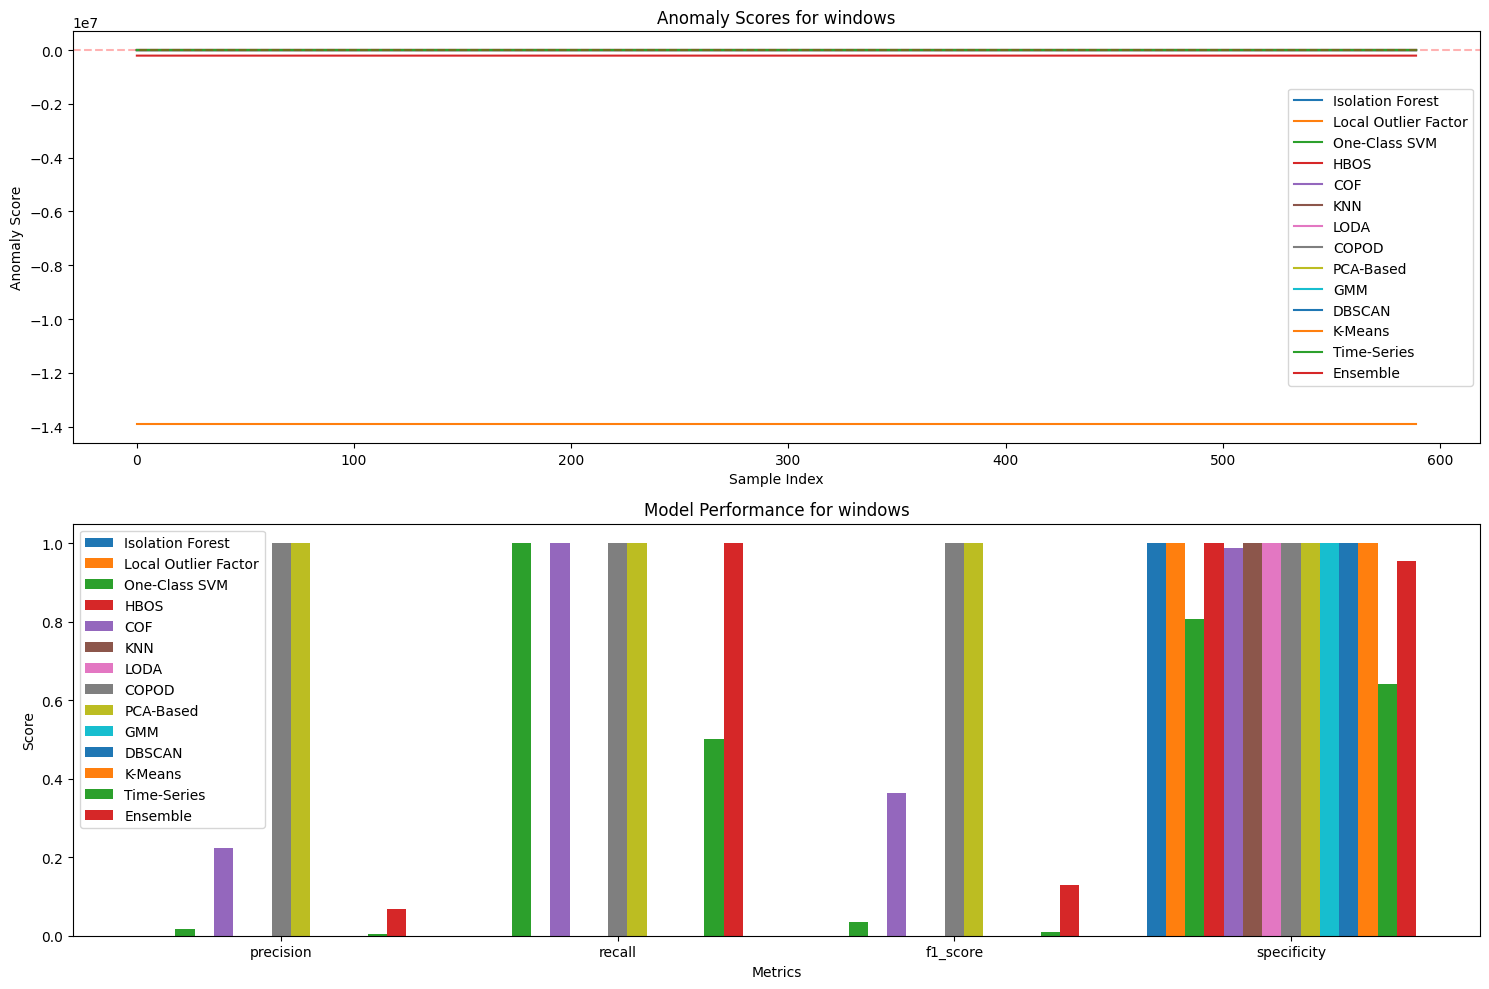


Visualizing results for system


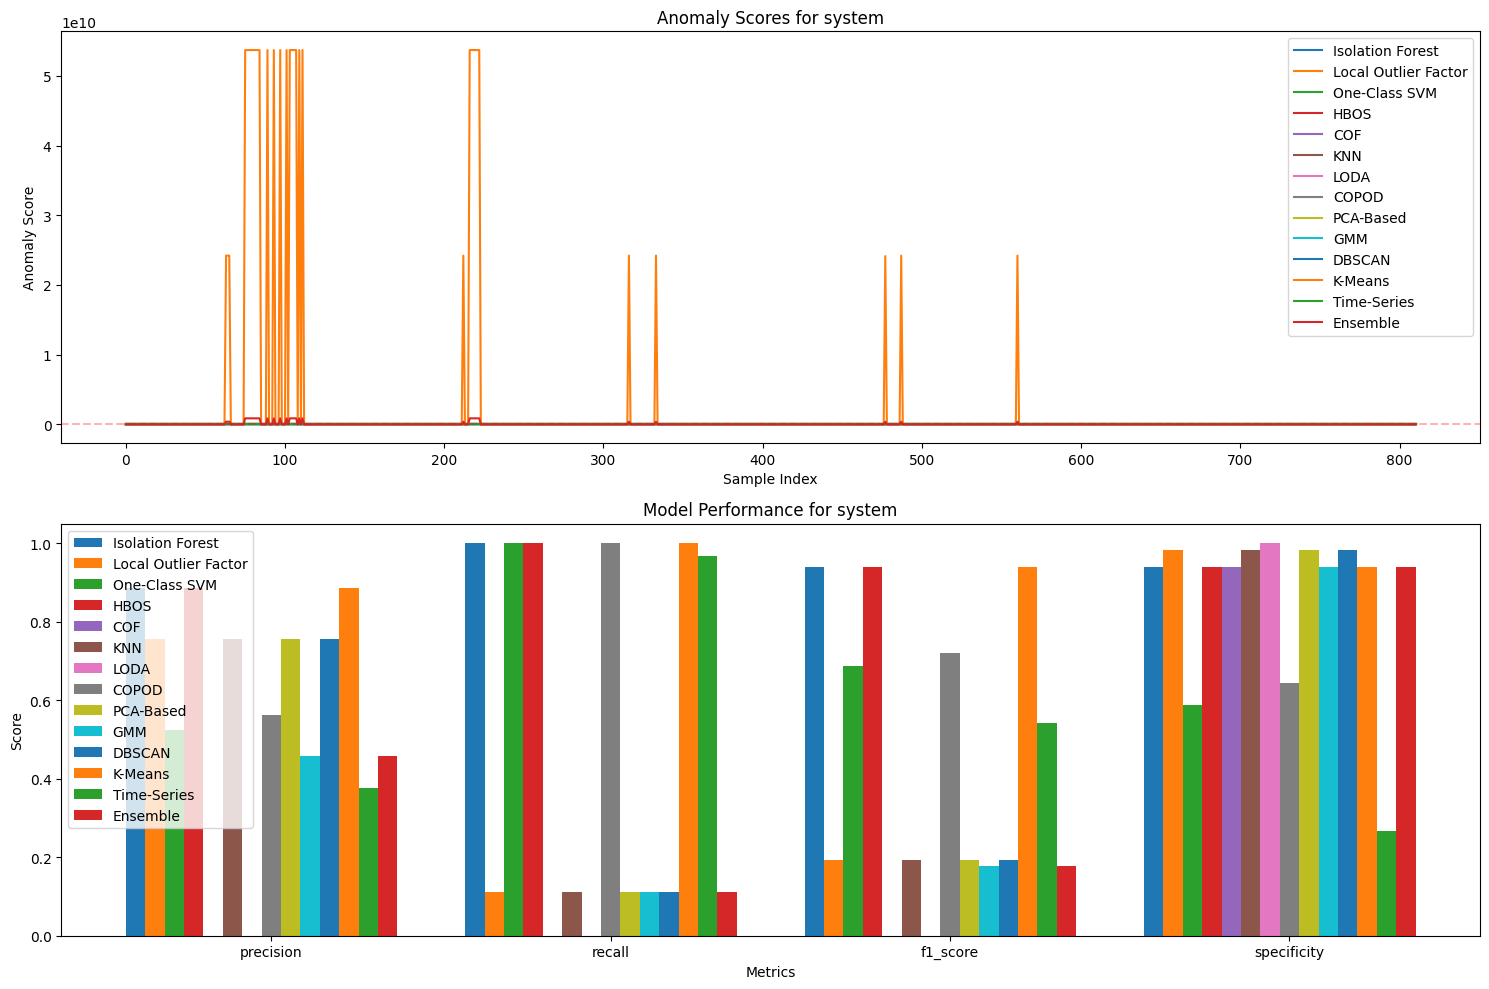


Visualizing results for security


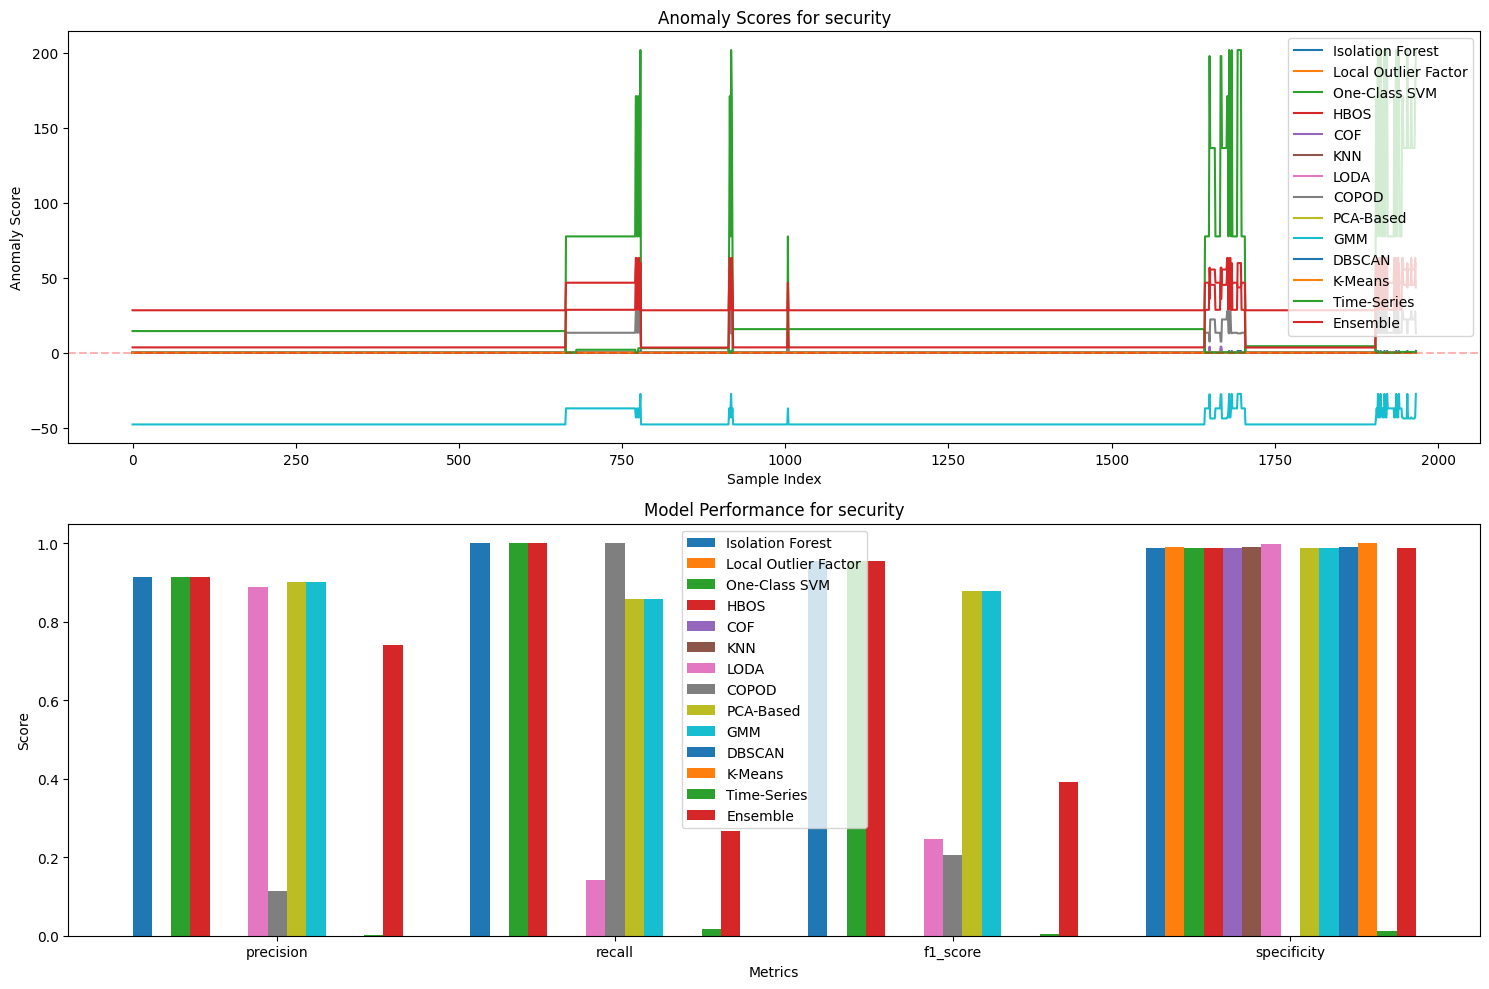


Visualizing results for all


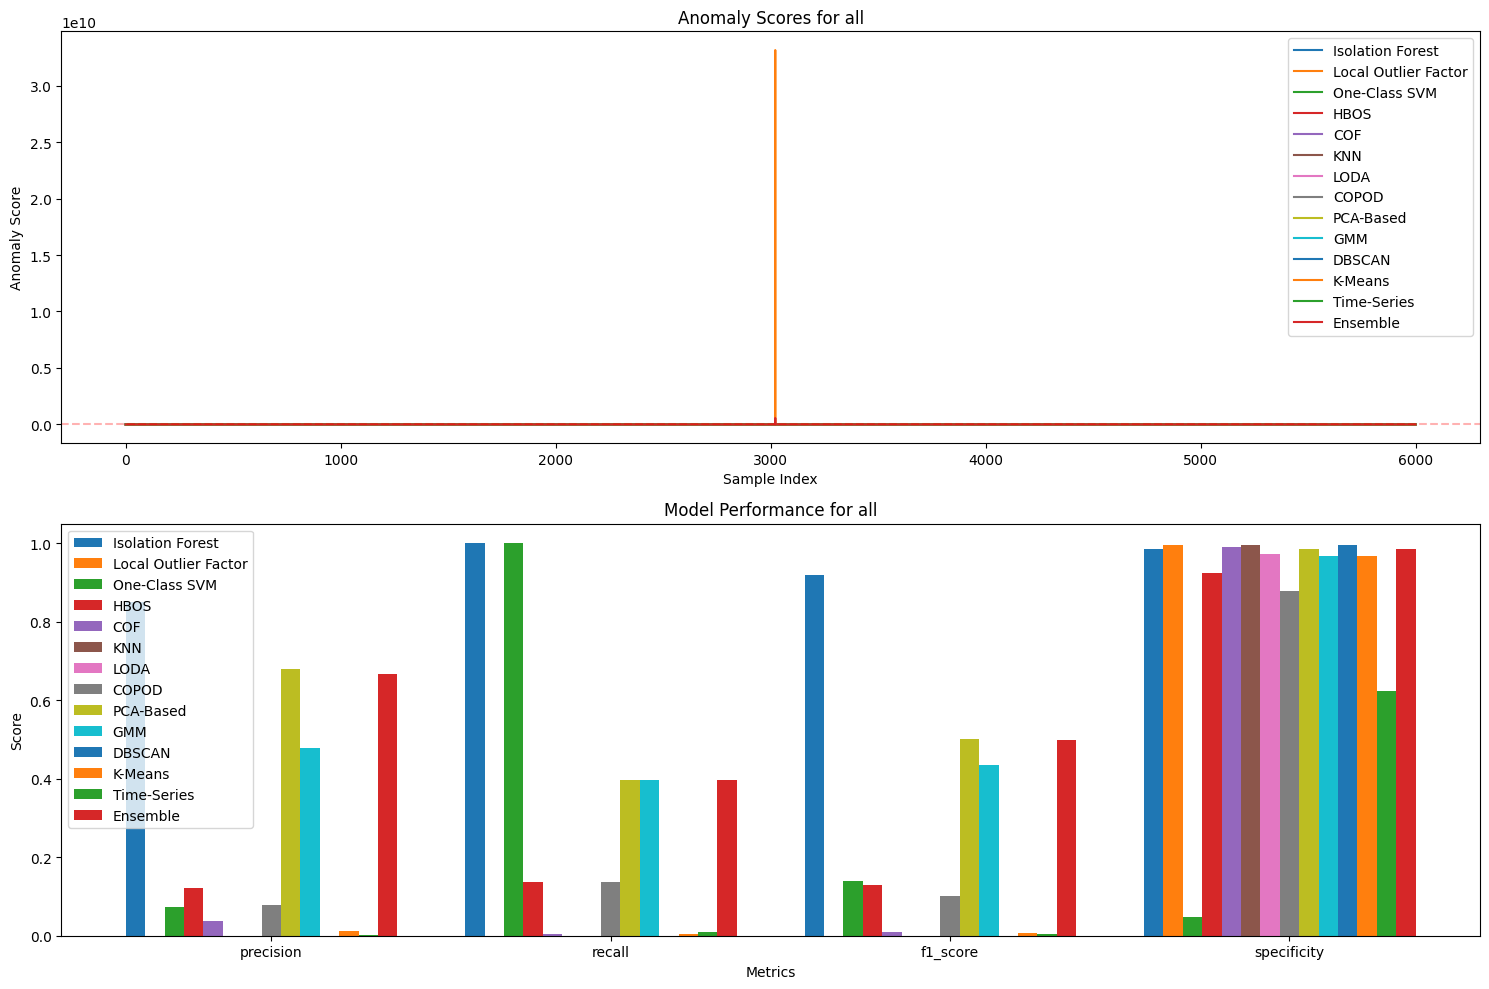


Visualizing results for general


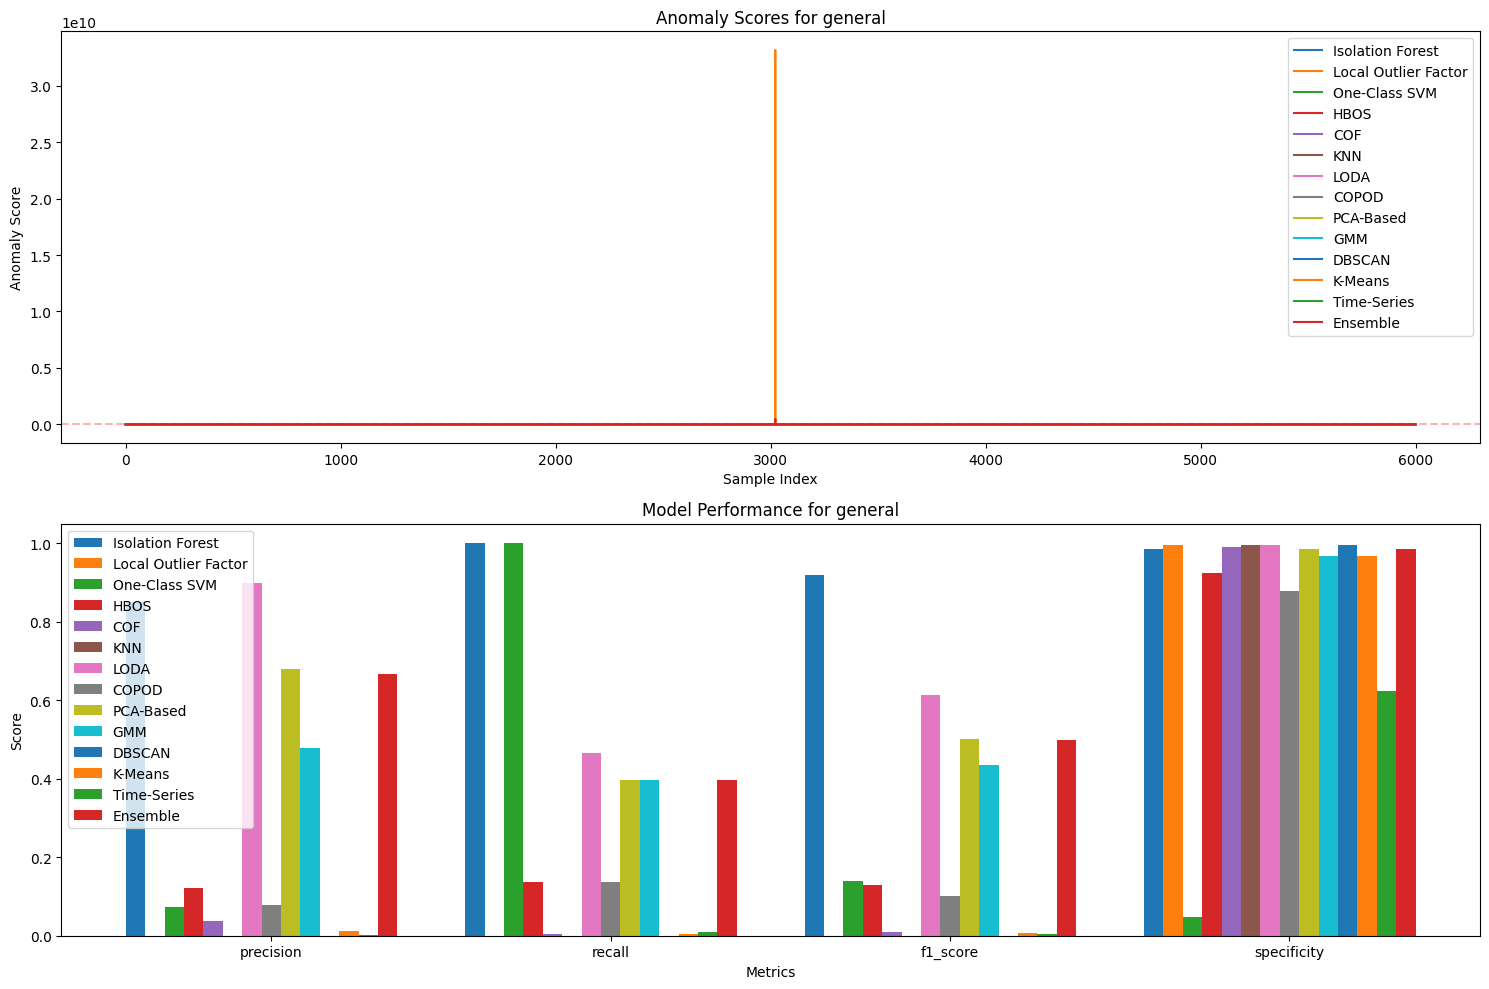


Security Pattern Analysis:

Found 66 clusters of related anomalies:

Cluster 1 (3 events):
  Time range: 2025-04-15 02:25:12.077000 to 2025-04-15 02:25:17.831000
  Sources: wazuh-server
  Rule groups: syslog, authentication_failed, access_control

Cluster 2 (21 events):
  Time range: 2025-04-15 02:31:01.399000 to 2025-04-15 02:31:03.357000
  Sources: wazuh-server
  Rule groups: syslog, linuxkernel

Cluster 3 (8 events):
  Time range: 2025-04-15 12:35:00.481000 to 2025-04-15 12:35:00.486000
  Sources: wazuh-server
  Rule groups: linuxkernel, syslog, authentication_failed, access_control

Cluster 4 (96 events):
  Time range: 2025-04-15 13:14:01.980000 to 2025-04-15 13:14:46.695000
  Sources: LAPTOP-RSR2EPL0
  Rule groups: windows_security, windows, authentication_success

Cluster 5 (10 events):
  Time range: 2025-04-15 13:23:55.164000 to 2025-04-15 13:25:27.626000
  Sources: wazuh-server
  Rule groups: ossec, syslog, authentication_failed, access_control

Cluster 6 (4 events):
  Time ra

In [30]:
def main():
    # Assuming your preprocessed data is stored in a variable 
    # and your splits are available from your previous code
    
    # Train traditional anomaly detection models
    results = train_and_evaluate_models(splits)
    
    # Add time series specific detection
    time_series_results = apply_time_series_detection(splits)
    
    # Merge time series results into main results
    for source_type, ts_result in time_series_results.items():
        if source_type in results:
            results[source_type].update(ts_result)
        else:
            results[source_type] = ts_result
    
    # Create ensemble models
    results = create_ensemble_model(results, splits)
    
    # Visualize results
    visualize_results(splits, results)
    
    # Identify significant anomalies
    anomalies = identify_anomalies(results, splits)
    
    # Perform security-specific analysis
    if 'is_anomaly' in next(iter(splits.values()))['test_df'].columns:
        original_df = pd.concat([split_data['test_df'] for split_data in splits.values()])
        analyze_security_patterns(anomalies, original_df)
    
    # Display top anomalies
    if len(anomalies) > 0:
        print("\nTop anomalies detected:")
        
        # For each anomaly, show relevant information
        for idx, row in anomalies.head(10).iterrows():
            print(f"\nAnomaly in {row['source_type']} data:")
            print(f"  Average anomaly score: {row['avg_anomaly_score']:.3f}")
            print(f"  Models flagging as anomaly: {row['anomaly_votes']}/{len(results[row['source_type']])}")
            
            # Display context information from original log
            if '@timestamp' in row:
                print(f"  Timestamp: {row['@timestamp']}")
            if 'agent.name' in row:
                print(f"  Agent: {row['agent.name']}")
            if 'rule.level' in row:
                print(f"  Rule level: {row['rule.level']}")
            if 'rule.groups' in row:
                print(f"  Groups: {row['rule.groups']}")
            if 'location' in row and row['location'] != '-':
                print(f"  Location: {row['location']}")
            if 'message' in row and row['message'] != '-':
                print(f"  Message: {row['message']}")
            if 'data.file' in row and row['data.file'] != '-':
                print(f"  File: {row['data.file']}")
            if 'data.command' in row and row['data.command'] != '-':
                print(f"  Command: {row['data.command']}")
            if 'data.title' in row and row['data.title'] != '-':
                print(f"  Title: {row['data.title']}")
    else:
        print("No significant anomalies detected.")
    
    # Save models for future use
    save_models(results)
    
    return results

def save_models(results):
    """Save trained models for future use"""
    import joblib
    import os
    
    # Create directory if it doesn't exist
    if not os.path.exists('models'):
        os.makedirs('models')
    
    # Save each model
    for source_type, source_results in results.items():
        for model_name, model_results in source_results.items():
            if 'model' in model_results:
                try:
                    model = model_results['model']
                    filename = f"models/{source_type}_{model_name.replace(' ', '_')}.joblib"
                    joblib.dump(model, filename)
                    print(f"Saved model: {filename}")
                except Exception as e:
                    print(f"Could not save {source_type}_{model_name}: {str(e)}")

# Execute main function
if __name__ == "__main__":
    main()